<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-dataset" data-toc-modified-id="load-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load dataset</a></span></li><li><span><a href="#analysis-the-sales-change-of-coca-cola-from-2016-to-2019" data-toc-modified-id="analysis-the-sales-change-of-coca-cola-from-2016-to-2019-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>analysis the sales change of coca-cola from 2016 to 2019</a></span></li></ul></div>

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 40)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### load dataset

In [2]:
data = pd.read_csv("PHILIPPINES_BEVERAGE_PURCHASE_HHP_CLEANED.csv",encoding='utf-16')

In [3]:
data_df = pd.DataFrame(data)

In [4]:
data_df.drop(['REFID'],axis=1)

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
0,1,101006101,1,MT,SUPERMARKETS,Other,0.270,50.0,185.185185,27.000000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,27.5 G (8- W/ 10% MORE CONTENT),SACHET,BROWN / BROWN COFFEE / BROWN COFFEE MIX,JUST RIGHT BLEND COFFEE MIX,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
1,2,101006101,2,MT,SUPERMARKETS,Other,0.500,28.0,56.000000,500.000000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
2,3,101006101,2,MT,SUPERMARKETS,Other,1.800,60.0,33.333333,300.000000,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
3,4,101006101,2,MT,SUPERMARKETS,Other,0.500,28.0,56.000000,500.000000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/21/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
4,5,101006101,2,MT,SUPERMARKETS,Other,0.250,50.0,200.000000,25.000000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/28/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
5,6,101006101,2,MT,SUPERMARKETS,Other,1.500,54.0,36.000000,250.000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/28/2016,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
6,7,101006101,4,MT,SUPERMARKETS,Other,1.500,60.0,40.000000,250.000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,3/6/2016,3/27/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
7,8,101006101,2,MT,SUPERMARKETS,Other,0.500,20.0,40.000000,250.000000,SOFTDRINKS,COCA-COLA,SPRITE,250 ML (SPRITE MISMO P10),PLASTIC BOTTLE,LEMON-LIME / LEMON + LIME,,,SOFTDRINKS COCA-COLA SPRITE 250 ML (SPRITE MIS...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,3/20/2016,3/27/2016,2.0,1.0,2.0,Coca-Cola,SPRITE
8,9,101006101,2,MT,SUPERMARKETS,Other,0.250,50.0,200.000000,25.000000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,3/27/2016,3/27/2016,10.0,1.0,10.0,PT Torabika,Untagged
9,10,101006101,2,MT,SUPERMARKETS,Other,1.000,40.0,40.000000,250.000000,SOFTDRINKS,COCA-COLA,COKE,250 ML,PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 250 ML PLASTIC BOTTL...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,3/27/2016,3/27/2016,4.0,1.0,4.0,Coca-Cola,COCA-COLA


In [5]:
#search the brand under the coca-cola
data_df[data_df['MANUFACTURER'] == 'COCA-COLA']['BRAND'].value_counts()

COKE                 138098
ROYAL                 24487
SPRITE                20559
WILKINS               10177
MINUTE MAID            4190
SPARKLE                2002
POP                    1460
WILKINS PURE            443
SARSI                   168
VIVA                    125
WILKINS DELIGHT         103
NUTRI JUICE               5
8 O'CLOCK FUNCHUM         1
Name: BRAND, dtype: int64

In [6]:
res=data_df[data_df['MANUFACTURER'] == 'COCA-COLA']['CAT'].value_counts()

Text(0.5, 1.0, '2016-2019 coca-cola product percent in philippnes')

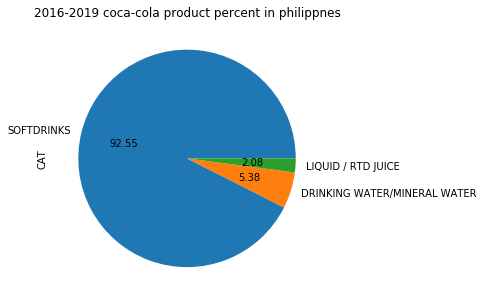

In [7]:
res.plot.pie(figsize=(5,5),autopct='%.2f')
plt.title("2016-2019 coca-cola product percent in philippnes")

In [8]:
res

SOFTDRINKS                      186774
DRINKING WATER/MINERAL WATER     10848
LIQUID / RTD JUICE                4196
Name: CAT, dtype: int64

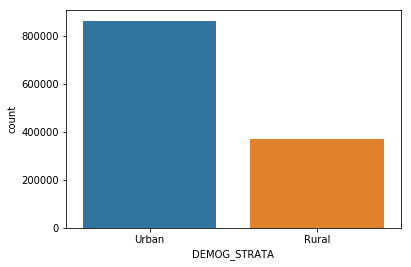

In [9]:
sns.countplot(data_df['DEMOG_STRATA'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

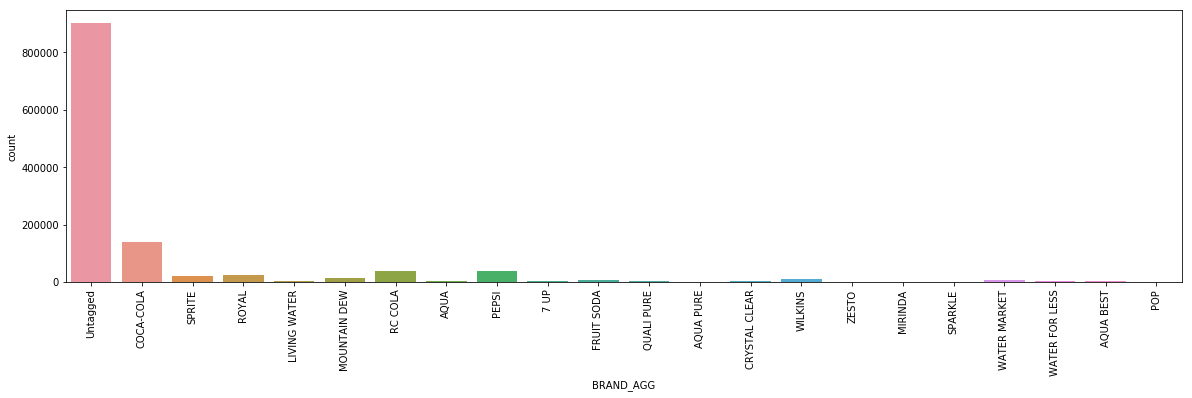

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(data_df['BRAND_AGG'])
plt.xticks(rotation=90)

In [11]:
res1=data_df[data_df["PACKAGE"] == "CAN"].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean()
res1

PACKAGE  BRAND_AGG   
CAN      7 UP             65.204678
         COCA-COLA        70.977168
         FRUIT SODA       56.542149
         MIRINDA          65.200391
         MOUNTAIN DEW     63.821471
         PEPSI            57.597379
         RC COLA          58.902539
         ROYAL            70.080552
         SPRITE           70.517662
         Untagged        101.970501
         ZESTO            56.436027
Name: Price_Per_Liter_CORR, dtype: float64

Text(0.5, 1.0, "The price of 'CAN' for different brands")

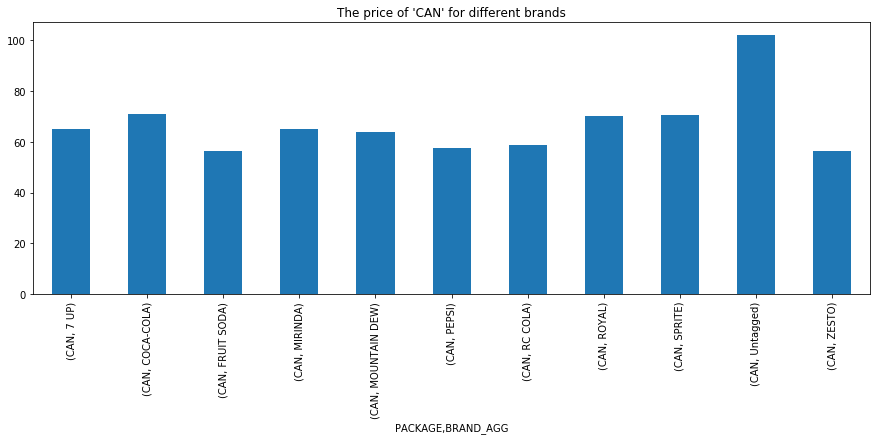

In [12]:
plt.figure(figsize=(15,5))
res1.plot.bar()
plt.title("The price of 'CAN' for different brands")

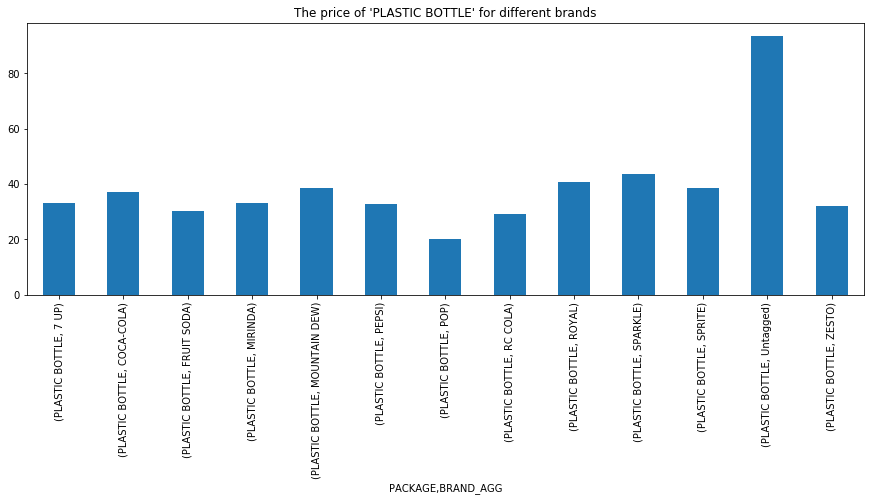

In [13]:
plt.figure(figsize=(15,5))
plt.title("The price of 'PLASTIC BOTTLE' for different brands")
data_df[data_df["PACKAGE"] == "PLASTIC BOTTLE"].groupby(['PACKAGE','BRAND_AGG'])['Price_Per_Liter_CORR'].mean().plot.bar()

In [14]:
res2=data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_REGION'].value_counts()

Text(0.5, 1.0, 'Sales of COCA-COLA in different regions')

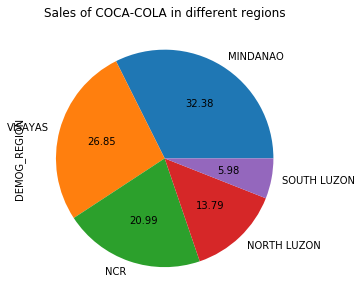

In [15]:
res2.plot.pie(figsize=(5,5),autopct='%.2f')
plt.title("Sales of COCA-COLA in different regions")

In [16]:
res2

MINDANAO       65404
VISAYAS        54235
NCR            42392
NORTH LUZON    27855
SOUTH LUZON    12075
Name: DEMOG_REGION, dtype: int64

In [17]:
data_df['MANUFACTURER_AGG'].value_counts()


OTHERS                    258494
Nestle                    253912
Coca-Cola                 201961
PT Torabika               177439
URC                       161096
PepsiCo                    65924
Asiawide Refreshments      46178
Zesto                      29973
Del Monte                  15936
Asia Brewery               10680
Philippine SpringWater      7253
RFM Corp.                   2762
Dole                         992
Fonterra                     578
Name: MANUFACTURER_AGG, dtype: int64

Text(0.5, 1.0, 'Sales of COCA-COLA in different channel')

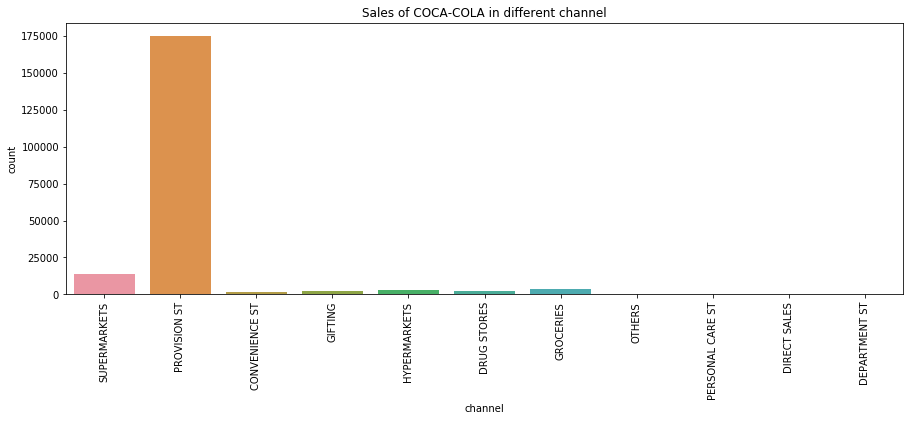

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['channel'])
plt.xticks(rotation=90)
plt.title("Sales of COCA-COLA in different channel")

Text(0.5, 1.0, 'Sales of DEMOG_STRATA in different regions')

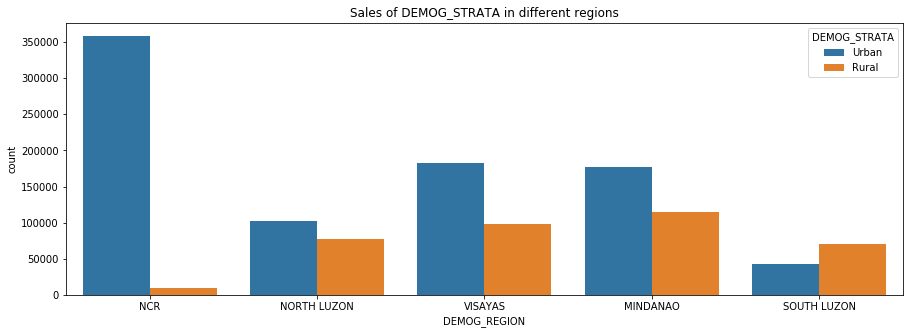

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_df['DEMOG_REGION'], hue=data_df['DEMOG_STRATA'])
plt.title("Sales of DEMOG_STRATA in different regions")

In [20]:
data_df.groupby(['MANUFACTURER_AGG','PACKAGE'])['Price_Per_Liter_CORR'].mean()

MANUFACTURER_AGG        PACKAGE                     
Asia Brewery            BOTTLED WATER                     17.756287
                        CAN                               60.401979
                        DISPENSER                          2.794613
                        GLASS BOTTLE                      55.545470
                        PLASTIC BOTTLE                    57.958572
                        TETRA PACK                        76.000000
Asiawide Refreshments   CAN                               60.772121
                        GLASS BOTTLE                      25.230186
                        PLASTIC BOTTLE                    30.105837
Coca-Cola               BOTTLED WATER                     17.356636
                        CAN                               70.637605
                        DISPENSER                          8.420567
                        DOY PACK                          25.000000
                        FOIL PACK                         32.00

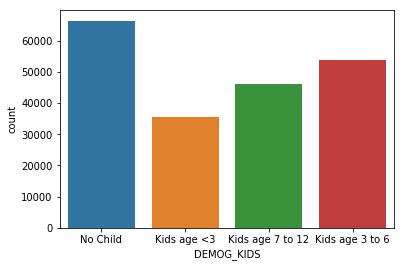

In [21]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_KIDS'])

In [22]:
data_df.head()

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
0,1,101006101,1,MT,SUPERMARKETS,Other,0.27,50.0,185.185185,27.0,REFID06202150524077195004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,27.5 G (8- W/ 10% MORE CONTENT),SACHET,BROWN / BROWN COFFEE / BROWN COFFEE MIX,JUST RIGHT BLEND COFFEE MIX,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged
1,2,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
2,3,101006101,2,MT,SUPERMARKETS,Other,1.80,60.0,33.333333,300.0,REFID06802040083003006000000,SOFTDRINKS,COCA-COLA,COKE,300 ML (COCA-COLA MISMO P10),PLASTIC BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 300 ML (COCA-COLA MI...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/7/2016,2/28/2016,6.0,1.0,6.0,Coca-Cola,COCA-COLA
3,4,101006101,2,MT,SUPERMARKETS,Other,0.50,28.0,56.000000,500.0,REFID05902060006002002005000,LIQUID / RTD SPORTS / ENERGY D,PEPSI-COLA PRODUCTS PHILIPPINES INC.,GATORADE,500ML,PLASTIC BOTTLE,LEMON-LIME,REGULAR (PET),,LIQUID / RTD SPORTS / ENERGY D PEPSI-COLA PROD...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/21/2016,2/28/2016,1.0,1.0,1.0,PepsiCo,Untagged
4,5,101006101,2,MT,SUPERMARKETS,Other,0.25,50.0,200.000000,25.0,REFID06202150209061001004000,INSTANT COFFEE,PT TORABIKA EKA SEMESTA,KOPIKO,25 G,SACHET,MORE IN 1,REGULAR/CLASSIC,,INSTANT COFFEE PT TORABIKA EKA SEMESTA KOPIKO ...,0,0,NCR,HH Size 1-2,C,Aged 55+,No Child,Not Working,Urban,Adult Single / Couple,2/28/2016,2/28/2016,10.0,1.0,10.0,PT Torabika,Untagged


Text(0.5, 1.0, 'the sales of different packages under the manufactuere of Coca-cola')

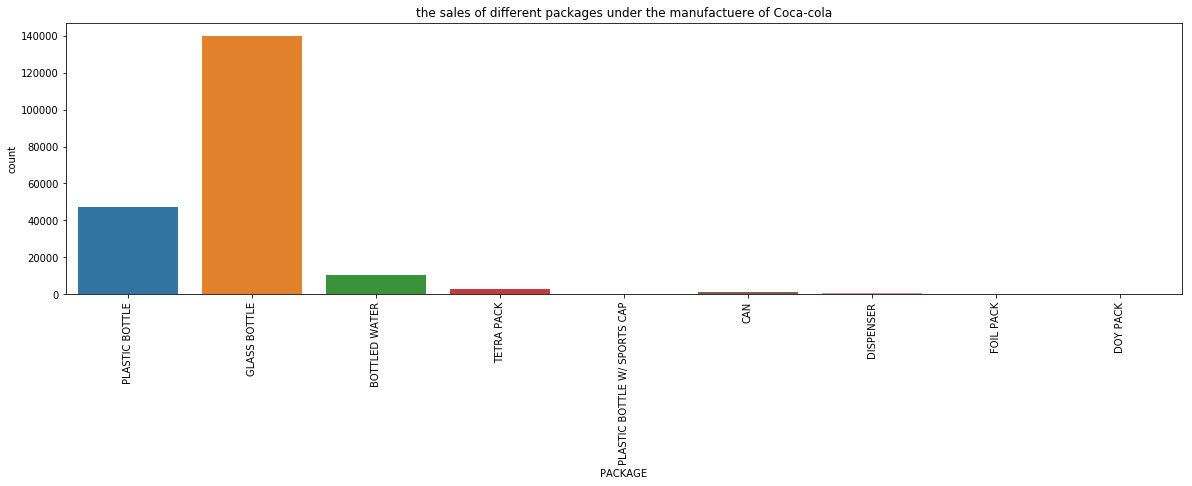

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['PACKAGE'])
plt.xticks(rotation=90)
plt.title("the sales of different packages under the manufactuere of Coca-cola")

In [26]:
data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['CAT'].value_counts()

SOFTDRINKS                        186774
DRINKING WATER/MINERAL WATER       10848
LIQUID / RTD JUICE                  4196
LIQUID / RTD SPORTS / ENERGY D       143
Name: CAT, dtype: int64

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233178 entries, 0 to 1233177
Data columns (total 37 columns):
seqno                   1233178 non-null int64
house                   1233178 non-null int64
weekday                 1233178 non-null int64
trade                   1233178 non-null object
channel                 1233178 non-null object
Store                   1233178 non-null object
Liters_Bought_CORR      1233178 non-null float64
Spend_CORR              1233178 non-null float64
Price_Per_Liter_CORR    1233178 non-null float64
Unit_Size_CORR          1233178 non-null float64
REFID                   1233178 non-null object
CAT                     1233178 non-null object
MANUFACTURER            1233178 non-null object
BRAND                   1233178 non-null object
PACKSIZE                1233178 non-null object
PACKAGE                 1233178 non-null object
FLAVOUR                 1004985 non-null object
VARIANT1                1233178 non-null object
VARIANT2              

Text(0.5, 1.0, 'which DEMOG_HHSIZE buy Coca-Cola most?')

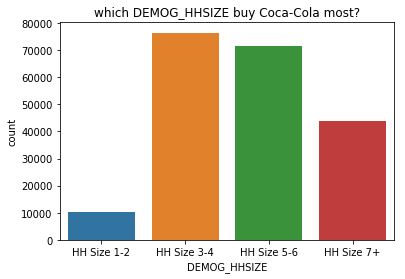

In [43]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_HHSIZE'])
plt.title("which DEMOG_HHSIZE buy Coca-Cola most?")

Text(0.5, 1.0, "Which region has the most number of 'HH Size 3-4' or 'HH Size 5-6'")

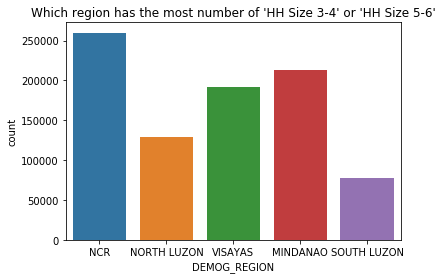

In [45]:
sns.countplot(data_df[(data_df['DEMOG_HHSIZE'] == 'HH Size 3-4') |(data_df['DEMOG_HHSIZE'] == 'HH Size 5-6')]['DEMOG_REGION'])
plt.title("Which region has the most number of 'HH Size 3-4' or 'HH Size 5-6'")

Text(0.5, 1.0, 'which DEMOG_HHSEC buys the coca-cola most?')

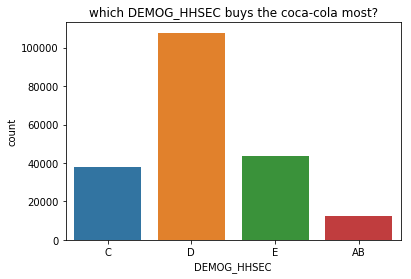

In [48]:
sns.countplot(data_df[data_df['MANUFACTURER_AGG'] == 'Coca-Cola']['DEMOG_HHSEC'])
plt.title("which DEMOG_HHSEC buys the coca-cola most?")

Text(0.5, 1.0, 'which region has the most DEMOG_REGION:D?')

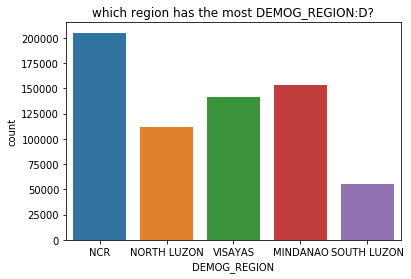

In [49]:
sns.countplot(data_df[data_df['DEMOG_HHSEC'] == 'D']['DEMOG_REGION'])
plt.title("which region has the most DEMOG_REGION:D?")

### analysis the sales change of coca-cola from 2016 to 2019

In [51]:
data_df["1W Rolling Week End"] = pd.to_datetime(data_df["1W Rolling Week End"])

In [61]:
data_df['DEMOG_REGION'].value_counts()

NCR            368173
MINDANAO       290708
VISAYAS        281547
NORTH LUZON    179606
SOUTH LUZON    113144
Name: DEMOG_REGION, dtype: int64

In [67]:
df['1W Rolling Week End'].dt.year.value_counts()

2017    410332
2016    408206
2018    386242
2019     28398
Name: 1W Rolling Week End, dtype: int64

In [74]:
df[df['MANUFACTURER'] == 'COCA-COLA']

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_REGION,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
265238,265239,211057101,3,TT,PROVISION ST,Sari-sari stores,0.25,12.0,48.0,250.0,REFID06802100105003027000000,SOFTDRINKS,COCA-COLA,SPRITE,250 ML (SPRITE MISMO P10),PLASTIC BOTTLE,LEMON-LIME / LEMON + LIME,,,SOFTDRINKS COCA-COLA SPRITE 250 ML (SPRITE MIS...,1664,1506,NORTH LUZON,HH Size 7+,C,Aged 25-34,Kids age 3 to 6,Not Working,Urban,Mixed HH,2016-02-07,2/28/2016,1.0,1.0,1.0,Coca-Cola,SPRITE
391016,391017,302079101,6,TT,PROVISION ST,Sari-sari stores,2.00,56.0,28.0,1000.0,REFID06802040002002006000000,SOFTDRINKS,COCA-COLA,COKE,1000ML,GLASS BOTTLE,REGULAR COLA / COLA,,,SOFTDRINKS COCA-COLA COKE 1000ML GLASS BOTTLE ...,2695,3091,VISAYAS,HH Size 5-6,C,Aged 55+,No Child,Not Working,Urban,Older HH,2016-02-07,2/28/2016,2.0,1.0,2.0,Coca-Cola,COCA-COLA


In [75]:
df_coca = df[df['MANUFACTURER'] == 'COCA-COLA']

In [77]:
df_coca.groupby(['DEMOG_REGION']).agg('count')

,seqno,house,weekday,trade,channel,Store,Liters_Bought_CORR,Spend_CORR,Price_Per_Liter_CORR,Unit_Size_CORR,REFID,CAT,MANUFACTURER,BRAND,PACKSIZE,PACKAGE,FLAVOUR,VARIANT1,VARIANT2,SKU_DESC,CW_1Y,CW_2Y,DEMOG_HHSIZE,DEMOG_HHSEC,DEMOG_HWAGE,DEMOG_KIDS,DEMOG_WORKINGSTATUS,DEMOG_STRATA,DEMOG_LIFESTAGE,1W Rolling Week End,4W Rolling Week End,Units_Bought_CORR,Packs_Bought_CORR,Units_Per_Pack_CORR,MANUFACTURER_AGG,BRAND_AGG
DEMOG_REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MINDANAO,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,64872,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379,65379
NCR,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,36406,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336,42336
NORTH LUZON,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,25663,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837,27837
SOUTH LUZON,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,10862,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062,12062
VISAYAS,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,53270,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204,54204


In [78]:
df['1W Rolling Week End'].value_counts().shape

(156,)

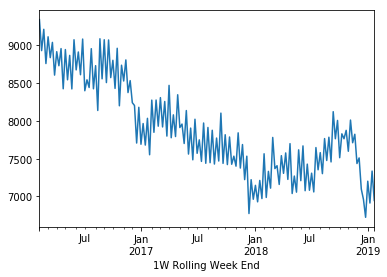

In [82]:
df.groupby(['1W Rolling Week End']).agg('count')['seqno'].plot.line()

In [86]:
df_temp = df.groupby(['DEMOG_REGION', '1W Rolling Week End']).agg('count')['seqno'].unstack()

In [97]:
df_temp

1W Rolling Week End,2016-02-07 00:00:00,2016-02-14 00:00:00,2016-02-21 00:00:00,2016-02-28 00:00:00,2016-03-06 00:00:00,2016-03-13 00:00:00,2016-03-20 00:00:00,2016-03-27 00:00:00,2016-04-03 00:00:00,2016-04-10 00:00:00,2016-04-17 00:00:00,2016-04-24 00:00:00,2016-05-01 00:00:00,2016-05-08 00:00:00,2016-05-15 00:00:00,2016-05-22 00:00:00,2016-05-29 00:00:00,2016-06-05 00:00:00,2016-06-12 00:00:00,2016-06-19 00:00:00,...,2018-09-16 00:00:00,2018-09-23 00:00:00,2018-09-30 00:00:00,2018-10-07 00:00:00,2018-10-14 00:00:00,2018-10-21 00:00:00,2018-10-28 00:00:00,2018-11-04 00:00:00,2018-11-11 00:00:00,2018-11-18 00:00:00,2018-11-25 00:00:00,2018-12-02 00:00:00,2018-12-09 00:00:00,2018-12-16 00:00:00,2018-12-23 00:00:00,2018-12-30 00:00:00,2019-01-06 00:00:00,2019-01-13 00:00:00,2019-01-20 00:00:00,2019-01-27 00:00:00
DEMOG_REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MINDANAO,2209,2108,2203,2052,2124,2048,2148,1944,2063,2056,2044,1949,2189,2011,2186,2028,2086,2071,2061,1988,...,1906,1896,1924,1828,1852,1821,1863,1799,1873,1699,1822,1710,1753,1660,1654,1576,1731,1601,1754,1643
NCR,2722,2609,2777,2676,2791,2828,2707,2616,2763,2734,2787,2647,2632,2571,2582,2513,2648,2602,2654,2731,...,2371,2261,2298,2245,2252,2349,2245,2285,2362,2366,2278,2289,2174,2104,1882,1923,1916,2066,2135,2079
NORTH LUZON,1422,1389,1308,1281,1329,1350,1348,1270,1277,1264,1294,1172,1308,1264,1223,1164,1341,1228,1259,1178,...,1122,1049,1128,979,1102,1043,1121,1024,1107,1064,1114,1041,1122,978,965,896,1036,974,1015,982
SOUTH LUZON,908,882,859,776,896,844,830,809,803,766,820,704,817,742,822,751,805,787,857,816,...,753,736,752,677,721,712,711,676,785,730,723,668,705,654,696,617,688,638,655,627
VISAYAS,2079,1942,2065,1974,1973,1767,2006,1967,2010,1910,2012,1953,1998,1956,2054,1967,2194,1987,2081,1898,...,1970,1822,1904,1784,1902,1839,1935,1814,1884,1852,1886,1728,1756,1702,1764,1712,1831,1634,1777,1616


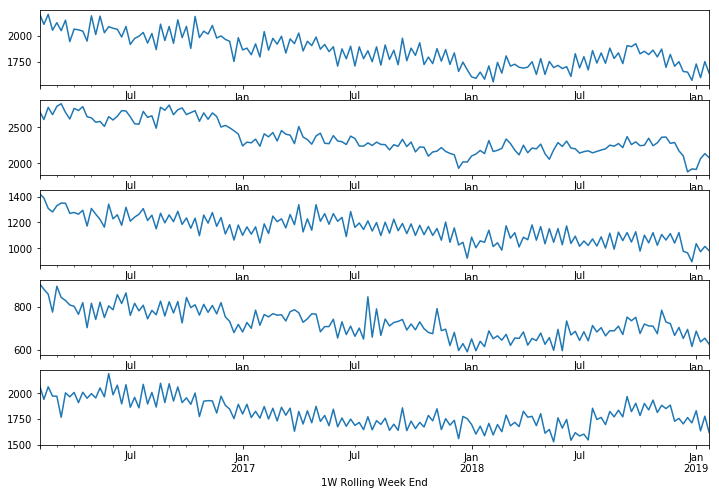

In [101]:
fig, ax = plt.subplots(5, figsize= (12, 8))
df_temp.iloc[0].plot.line(ax= ax[0])
df_temp.iloc[1].plot.line(ax= ax[1])
df_temp.iloc[2].plot.line(ax= ax[2])
df_temp.iloc[3].plot.line(ax= ax[3])
df_temp.iloc[4].plot.line(ax= ax[4])

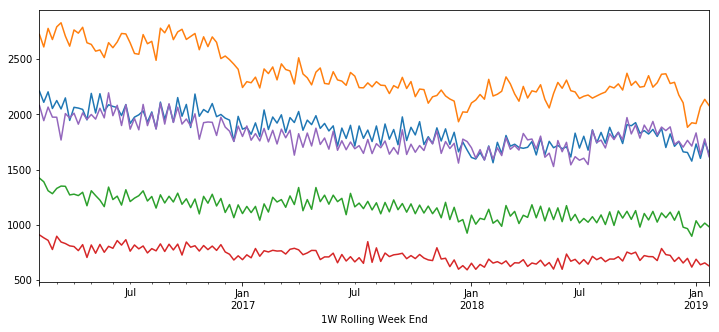

In [107]:
plt.figure(figsize=(12,5))
df_temp.iloc[0].plot.line()
df_temp.iloc[1].plot.line()
df_temp.iloc[2].plot.line()
df_temp.iloc[3].plot.line()
df_temp.iloc[4].plot.line()
plt.title("The sales change of coca-cola from 2016 to 2019")